In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import compute_class_weight
import load_data as ld
import evaluate_classification as ec


df, X_valid, y_valid = ld.load_train_data()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [2]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(df.drop(columns='Target'), df.loc[:,'Target'])


In [3]:
simp_target = df.loc[:,'Target'].copy()
simp_target[simp_target < 4] = 0
simp_target[simp_target == 4] = 1
simp_target

6139    0
609     1
8113    0
2318    1
4924    0
       ..
6281    1
8786    1
8006    1
4993    1
2674    0
Name: Target, Length: 2378, dtype: int64

In [4]:
simp_valid = y_valid.copy()
simp_valid[simp_valid < 4] = 0
simp_valid[simp_valid == 4] = 1
simp_valid

,Target
2586,1
7513,1
839,1
1116,1
8508,0
...,...
2934,0
2968,1
9361,0
386,1


k_3_uniform
Accuracy: 0.5294117647058824
F1 Score: 0.5180263565448223
Recall: 0.5294117647058824


k_3_distance
Accuracy: 0.5243697478991597
F1 Score: 0.5086359888810981
Recall: 0.5243697478991597


k_5_uniform
Accuracy: 0.5495798319327732
F1 Score: 0.5156055125902301
Recall: 0.5495798319327732


k_5_distance
Accuracy: 0.5394957983193277
F1 Score: 0.5078478240684184
Recall: 0.5394957983193277


k_10_uniform
Accuracy: 0.6016806722689075
F1 Score: 0.518052291490759
Recall: 0.6016806722689075


k_10_distance
Accuracy: 0.5764705882352941
F1 Score: 0.5197166989991517
Recall: 0.5764705882352941


k_15_uniform
Accuracy: 0.6168067226890757
F1 Score: 0.5219349043973984
Recall: 0.6168067226890757


k_15_distance
Accuracy: 0.5966386554621849
F1 Score: 0.5268538933486006
Recall: 0.5966386554621849


k_20_uniform
Accuracy: 0.6218487394957983
F1 Score: 0.515519478226397
Recall: 0.6218487394957983


k_20_distance
Accuracy: 0.6050420168067226
F1 Score: 0.5326363398560617
Recall: 0.6050420168067226




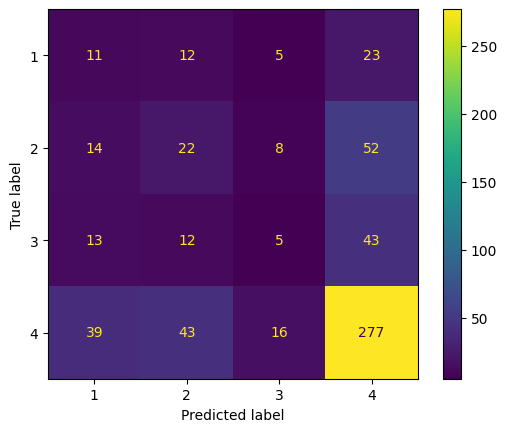

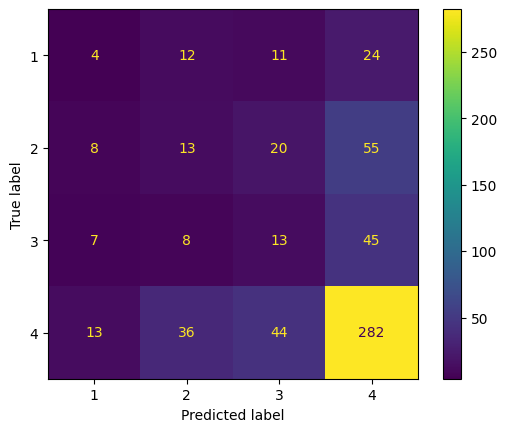

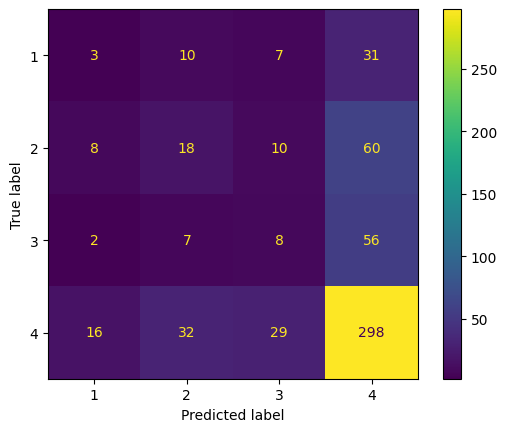

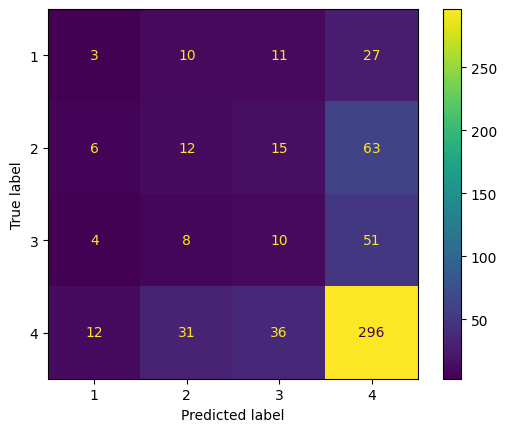

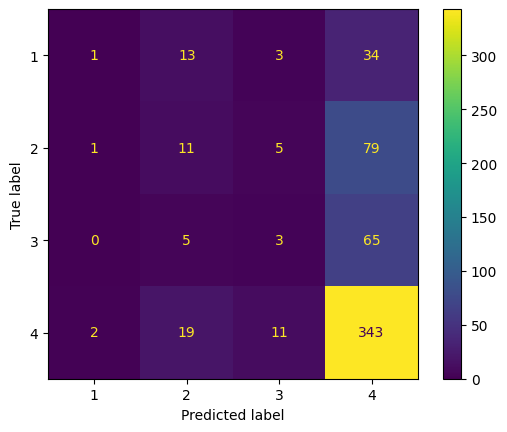

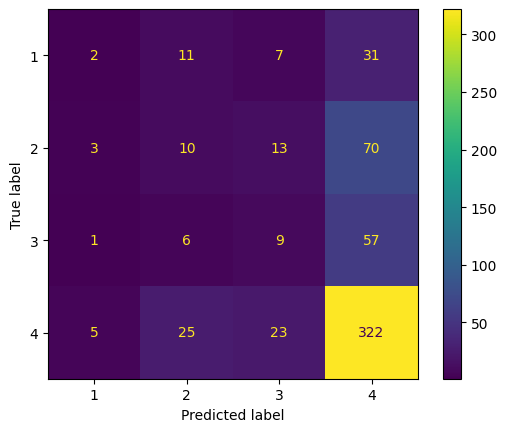

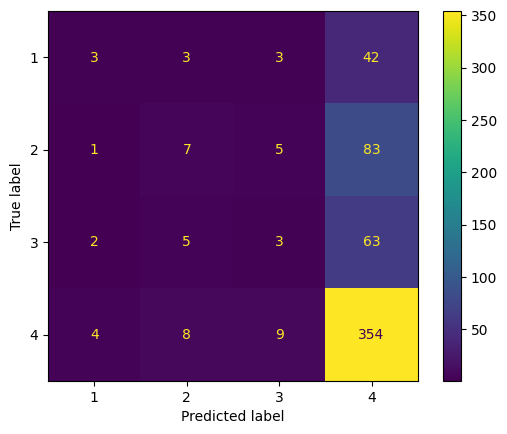

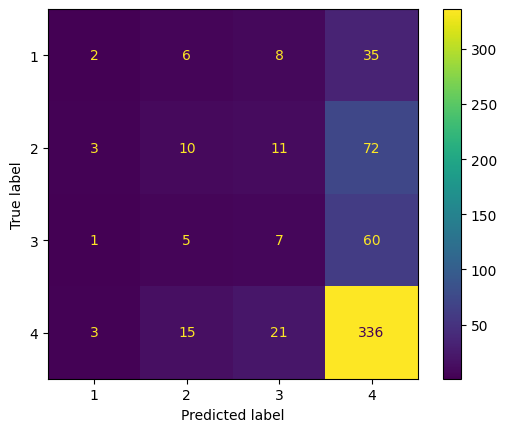

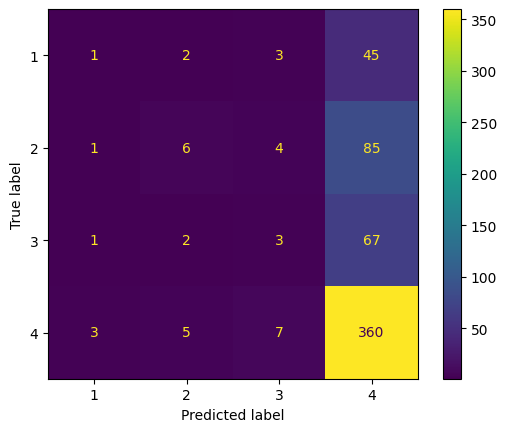

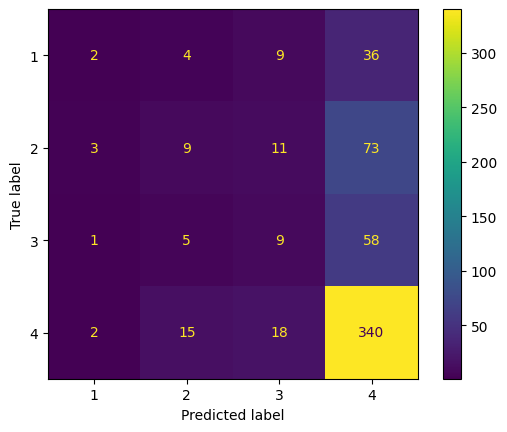

In [5]:
preds = {}
scores = {}
for num in [3,5,10,15,20]:
    for choice in ['uniform','distance']:
        neigh = KNeighborsClassifier(n_neighbors=num,weights=choice)
        neigh.fit(df.drop(columns='Target'),df.loc[:,'Target'])
        preds[f'k_{num}_{choice}'] = neigh.predict(X_valid)
        print(f'k_{num}_{choice}')
        accuracy, f1, recall = ec.evaluate_classification(preds[f'k_{num}_{choice}'],y_valid,cm=True)
        scores[f'k_{num}_{choice}'] = {'accuracy': accuracy, 'f1': f1, 'recall': recall}
        print('\n')
    

rad_3_uniform
Accuracy: 0.6302521008403361
F1 Score: 0.48730832539201246
Recall: 0.6302521008403361


rad_3_distance
Accuracy: 0.6302521008403361
F1 Score: 0.48730832539201246
Recall: 0.6302521008403361


rad_5_uniform
Accuracy: 0.626890756302521
F1 Score: 0.48571081325092014
Recall: 0.626890756302521


rad_5_distance
Accuracy: 0.626890756302521
F1 Score: 0.48571081325092014
Recall: 0.626890756302521


rad_10_uniform
Accuracy: 0.6252100840336134
F1 Score: 0.48490957913672184
Recall: 0.6252100840336134


rad_10_distance
Accuracy: 0.6252100840336134
F1 Score: 0.48490957913672184
Recall: 0.6252100840336134


rad_15_uniform
Accuracy: 0.6201680672268908
F1 Score: 0.48400213363180866
Recall: 0.6201680672268908


rad_15_distance
Accuracy: 0.6201680672268908
F1 Score: 0.48400213363180866
Recall: 0.6201680672268908


rad_20_uniform
Accuracy: 0.6201680672268908
F1 Score: 0.48726925843406255
Recall: 0.6201680672268908


rad_20_distance
Accuracy: 0.6201680672268908
F1 Score: 0.48726925843406255
Re

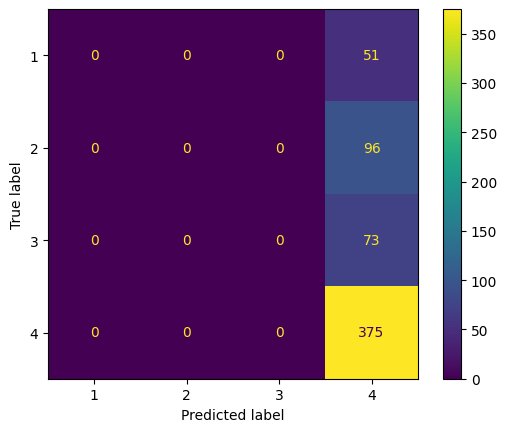

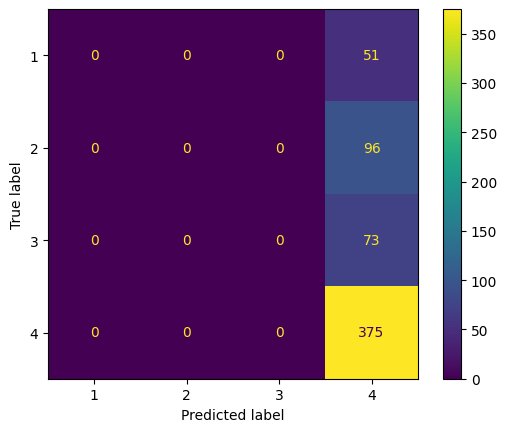

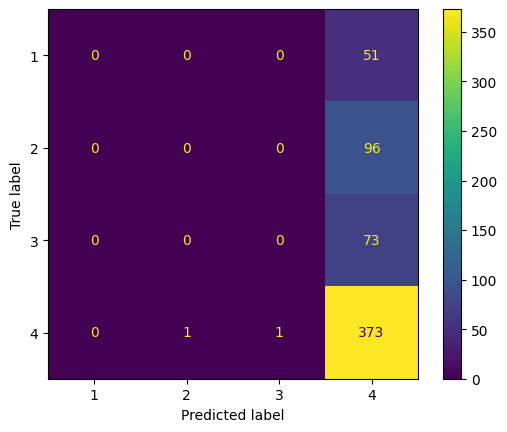

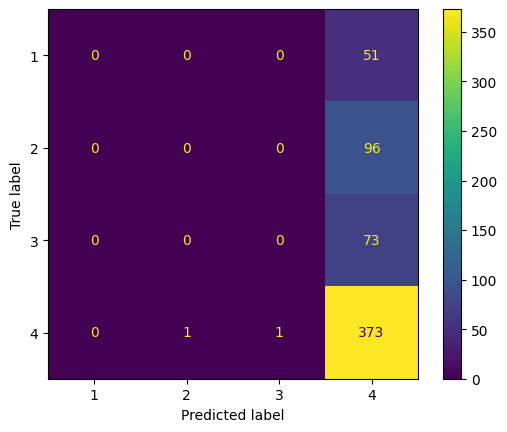

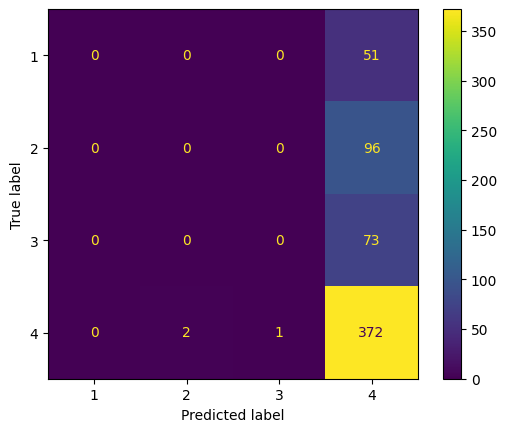

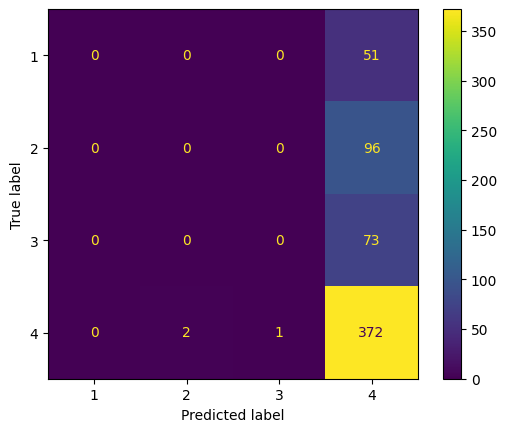

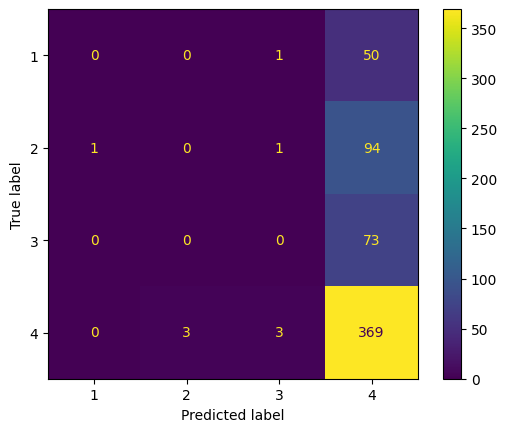

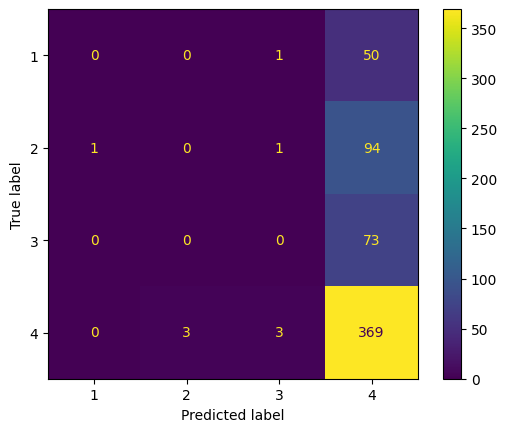

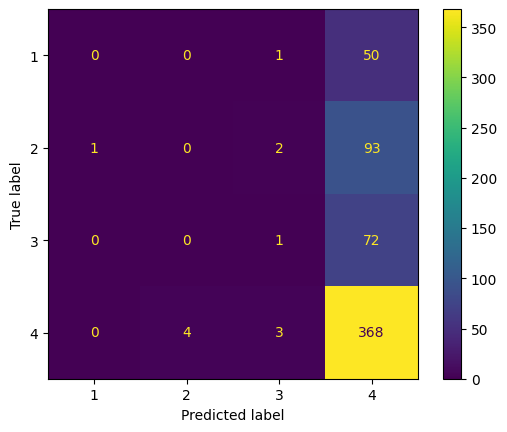

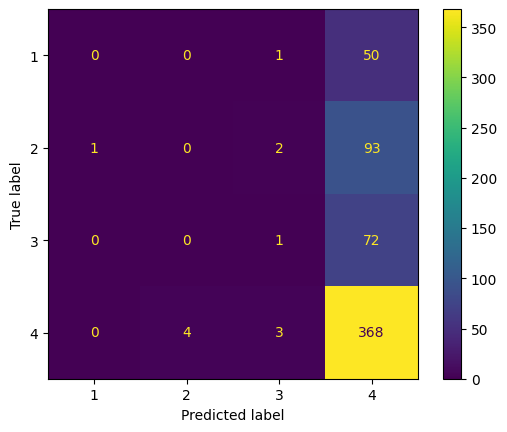

In [6]:
for num in [3,5,10,15,20]:
    for choice in ['uniform','distance']:
        neigh = RadiusNeighborsClassifier(radius=num, weights=choice, outlier_label='most_frequent')
        neigh.fit(df.drop(columns='Target'),df.loc[:,'Target'])
        preds[f'rad_{num}_{choice}'] = neigh.predict(X_valid)
        print(f'rad_{num}_{choice}')
        accuracy, f1, recall = ec.evaluate_classification(preds[f'rad_{num}_{choice}'],y_valid,cm=True)
        scores[f'rad_{num}_{choice}'] = {'accuracy': accuracy, 'f1': f1, 'recall': recall}
        print('\n')


re_3_uniform
Accuracy: 0.42521008403361343
F1 Score: 0.4744237408978184
Recall: 0.42521008403361343


re_3_distance
Accuracy: 0.44201680672268906
F1 Score: 0.47868956939430124
Recall: 0.44201680672268906


re_5_uniform
Accuracy: 0.41008403361344536
F1 Score: 0.46239398387060626
Recall: 0.41008403361344536


re_5_distance
Accuracy: 0.4504201680672269
F1 Score: 0.48846341627898326
Recall: 0.4504201680672269


re_10_uniform
Accuracy: 0.3865546218487395
F1 Score: 0.43563011737780666
Recall: 0.3865546218487395


re_10_distance
Accuracy: 0.44537815126050423
F1 Score: 0.49081766151930634
Recall: 0.44537815126050423


re_15_uniform
Accuracy: 0.4
F1 Score: 0.45070371045880825
Recall: 0.4


re_15_distance
Accuracy: 0.44873949579831934
F1 Score: 0.49497617441973424
Recall: 0.44873949579831934


re_20_uniform
Accuracy: 0.39663865546218485
F1 Score: 0.44795246880690903
Recall: 0.39663865546218485


re_20_distance
Accuracy: 0.45546218487394957
F1 Score: 0.5019561945675904
Recall: 0.45546218487394957

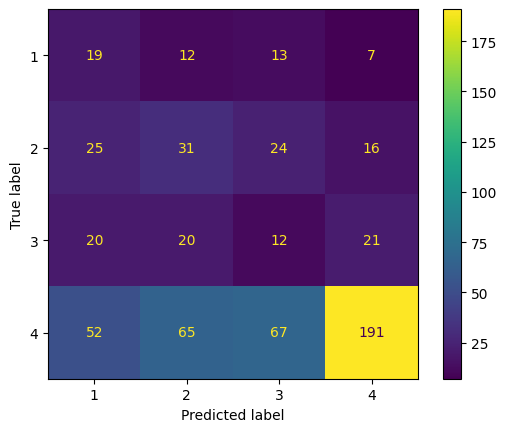

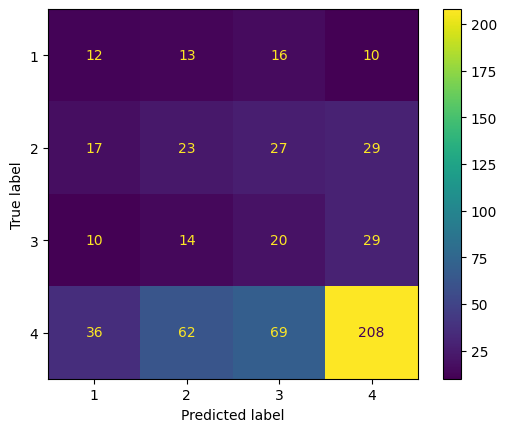

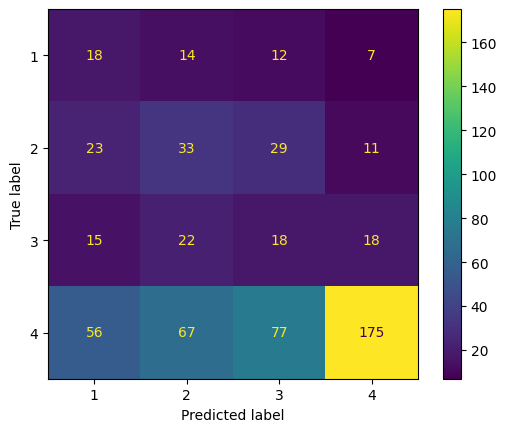

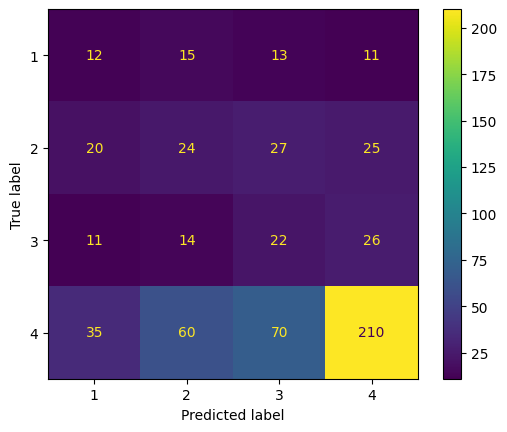

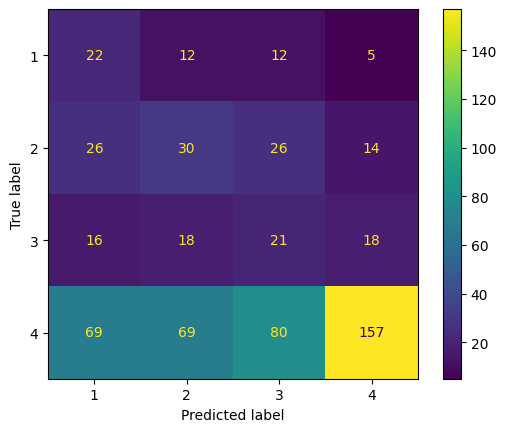

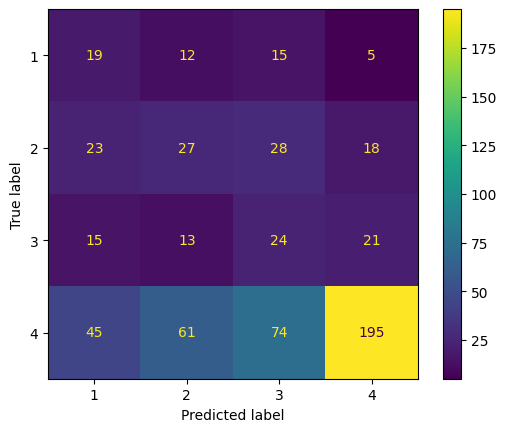

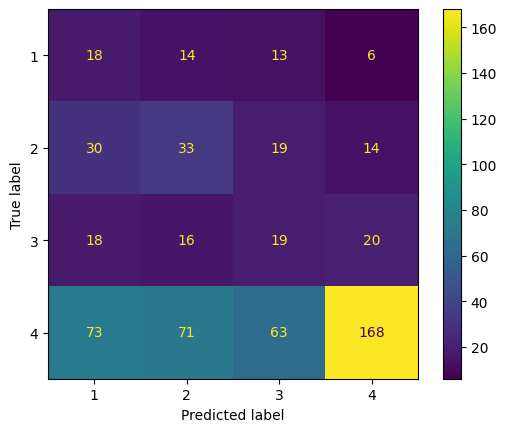

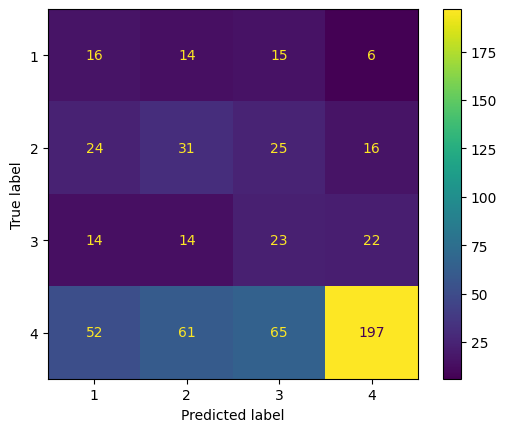

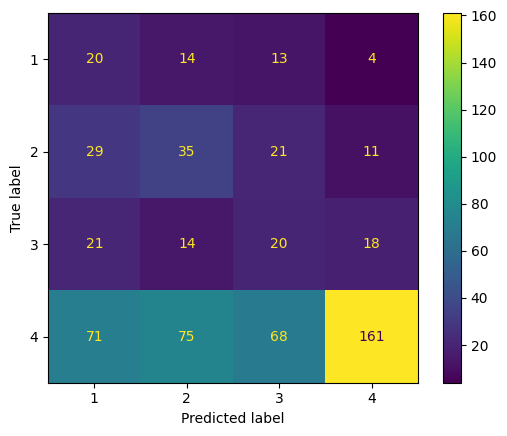

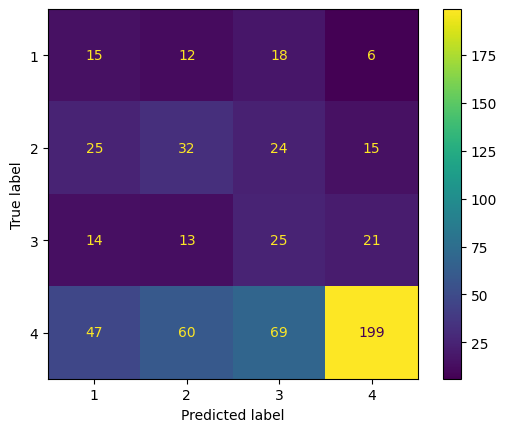

In [7]:
for num in [3,5,10,15,20]:
    for choice in ['uniform','distance']:
        neigh = KNeighborsClassifier(n_neighbors=num,weights=choice)
        neigh.fit(X_train_res,y_train_res)
        preds[f're_{num}_{choice}'] = neigh.predict(X_valid)
        print(f're_{num}_{choice}')
        accuracy, f1, recall = ec.evaluate_classification(preds[f're_{num}_{choice}'],y_valid,cm=True)
        scores[f're_{num}_{choice}'] = {'accuracy': accuracy, 'f1': f1, 'recall': recall}
        print('\n')

In [8]:
scores

{'k_3_uniform': {'accuracy': 0.5294117647058824,
  'f1': 0.5180263565448223,
  'recall': 0.5294117647058824},
 'k_3_distance': {'accuracy': 0.5243697478991597,
  'f1': 0.5086359888810981,
  'recall': 0.5243697478991597},
 'k_5_uniform': {'accuracy': 0.5495798319327732,
  'f1': 0.5156055125902301,
  'recall': 0.5495798319327732},
 'k_5_distance': {'accuracy': 0.5394957983193277,
  'f1': 0.5078478240684184,
  'recall': 0.5394957983193277},
 'k_10_uniform': {'accuracy': 0.6016806722689075,
  'f1': 0.518052291490759,
  'recall': 0.6016806722689075},
 'k_10_distance': {'accuracy': 0.5764705882352941,
  'f1': 0.5197166989991517,
  'recall': 0.5764705882352941},
 'k_15_uniform': {'accuracy': 0.6168067226890757,
  'f1': 0.5219349043973984,
  'recall': 0.6168067226890757},
 'k_15_distance': {'accuracy': 0.5966386554621849,
  'f1': 0.5268538933486006,
  'recall': 0.5966386554621849},
 'k_20_uniform': {'accuracy': 0.6218487394957983,
  'f1': 0.515519478226397,
  'recall': 0.6218487394957983},
 'k

In [15]:
len(scores.keys())

30

In [36]:
import pandas as pd

# create a DataFrame from the dictionary of dictionaries
df3 = pd.DataFrame.from_dict(scores, orient='index')
df3.sort_values(by = 'f1', ascending=False,inplace=True)

print(df3.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  accuracy &        f1 &    recall \\
\midrule
k\_20\_distance   &  0.605042 &  0.532636 &  0.605042 \\
k\_15\_distance   &  0.596639 &  0.526854 &  0.596639 \\
k\_15\_uniform    &  0.616807 &  0.521935 &  0.616807 \\
k\_10\_distance   &  0.576471 &  0.519717 &  0.576471 \\
k\_10\_uniform    &  0.601681 &  0.518052 &  0.601681 \\
k\_3\_uniform     &  0.529412 &  0.518026 &  0.529412 \\
k\_5\_uniform     &  0.549580 &  0.515606 &  0.549580 \\
k\_20\_uniform    &  0.621849 &  0.515519 &  0.621849 \\
k\_3\_distance    &  0.524370 &  0.508636 &  0.524370 \\
k\_5\_distance    &  0.539496 &  0.507848 &  0.539496 \\
re\_20\_distance  &  0.455462 &  0.501956 &  0.455462 \\
re\_15\_distance  &  0.448739 &  0.494976 &  0.448739 \\
re\_10\_distance  &  0.445378 &  0.490818 &  0.445378 \\
re\_5\_distance   &  0.450420 &  0.488463 &  0.450420 \\
rad\_3\_distance  &  0.630252 &  0.487308 &  0.630252 \\
rad\_3\_uniform   &  0.630252 &  0.487308 &  0.630252 \\
rad\_2

/var/folders/jp/y175t8cj1xn0v8nx88w4ftv00000gn/T/ipykernel_47068/3832828229.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df3.to_latex())


\begin{array}{c|ccc}
\text{} & \text{accuracy} & \text{f1} & \text{recall} \\
\hline
k\_20\_distance   &  0.605042 &  0.532636 &  0.605042 \\
k\_15\_distance   &  0.596639 &  0.526854 &  0.596639 \\
k\_15\_uniform    &  0.616807 &  0.521935 &  0.616807 \\
k\_10\_distance   &  0.576471 &  0.519717 &  0.576471 \\
k\_10\_uniform    &  0.601681 &  0.518052 &  0.601681 \\
k\_3\_uniform     &  0.529412 &  0.518026 &  0.529412 \\
k\_5\_uniform     &  0.549580 &  0.515606 &  0.549580 \\
k\_20\_uniform    &  0.621849 &  0.515519 &  0.621849 \\
k\_3\_distance    &  0.524370 &  0.508636 &  0.524370 \\
k\_5\_distance    &  0.539496 &  0.507848 &  0.539496 \\
re\_20\_distance  &  0.455462 &  0.501956 &  0.455462 \\
re\_15\_distance  &  0.448739 &  0.494976 &  0.448739 \\
re\_10\_distance  &  0.445378 &  0.490818 &  0.445378 \\
re\_5\_distance   &  0.450420 &  0.488463 &  0.450420 \\
rad\_3\_distance  &  0.630252 &  0.487308 &  0.630252 \\
rad\_3\_uniform   &  0.630252 &  0.487308 &  0.630252 \\
rad\_20\_uniform  &  0.620168 &  0.487269 &  0.620168 \\
rad\_20\_distance &  0.620168 &  0.487269 &  0.620168 \\
rad\_5\_uniform   &  0.626891 &  0.485711 &  0.626891 \\
rad\_5\_distance  &  0.626891 &  0.485711 &  0.626891 \\
rad\_10\_distance &  0.625210 &  0.484910 &  0.625210 \\
rad\_10\_uniform  &  0.625210 &  0.484910 &  0.625210 \\
rad\_15\_distance &  0.620168 &  0.484002 &  0.620168 \\
rad\_15\_uniform  &  0.620168 &  0.484002 &  0.620168 \\
re\_3\_distance   &  0.442017 &  0.478690 &  0.442017 \\
re\_3\_uniform    &  0.425210 &  0.474424 &  0.425210 \\
re\_5\_uniform    &  0.410084 &  0.462394 &  0.410084 \\
re\_15\_uniform   &  0.400000 &  0.450704 &  0.400000 \\
re\_20\_uniform   &  0.396639 &  0.447952 &  0.396639 \\
re\_10\_uniform   &  0.386555 &  0.435630 &  0.386555 \\
\end{array}

